<a href="https://colab.research.google.com/github/jcrestan1/BIG-DATA-SCIENCE/blob/main/DESAFIO_TITANIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pacotes

In [1]:
# Carga Bibliotecas
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt


# Base

In [2]:
#Dados
train = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/SHIFT/Data/titanic/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/SHIFT/Data/titanic/test.csv")

In [3]:
#Juntando treino e test para tratar
passengerId = test['PassengerId']
df = train.append(test, ignore_index=True)

<ipython-input-3-5bb01dd32060>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = train.append(test, ignore_index=True)


In [4]:
#Deixar o index de treino e text
train_index = len(train)
test_index = len (test)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [7]:
df.rename(columns={'Survived':'Sobrevivência','Pckass':'ClasIng','Age':'Idade','SibSp':'IrmConj','Parch':'PaiFilho','Fare':'Tarifa'}, inplace=True)

In [8]:
df.head()

,PassengerId,Sobrevivência,Pclass,Name,Sex,Idade,IrmConj,PaiFilho,Ticket,Tarifa,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df['Sex'] = df['Sex'].replace(['male','female'],['1','0'])

In [10]:
df['Sex'] = pd.to_numeric(df['Sex'])


In [11]:
cor = df.corr()

<ipython-input-11-1f0d48ef3315>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


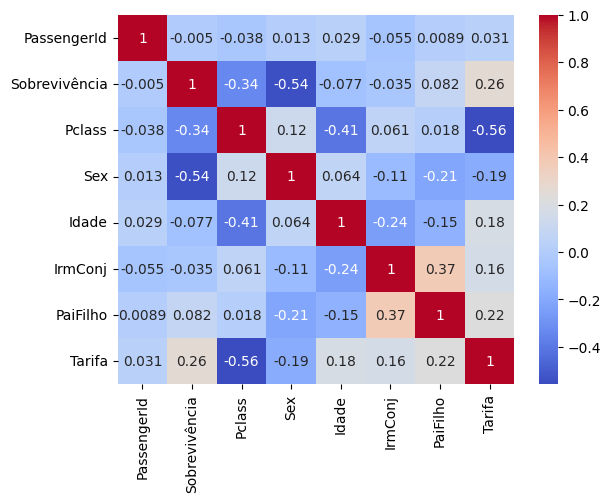

In [12]:
sns.heatmap(cor, annot = True, cmap = 'coolwarm')
plt.show()

# Tratamento dos dados

In [13]:
df.isnull().sum()

PassengerId         0
Sobrevivência     418
Pclass              0
Name                0
Sex                 0
Idade             263
IrmConj             0
PaiFilho            0
Ticket              0
Tarifa              1
Cabin            1014
Embarked            2
dtype: int64

In [14]:
df.describe()

,PassengerId,Sobrevivência,Pclass,Sex,Idade,IrmConj,PaiFilho,Tarifa
count,1309.000000,891.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,0.644003,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,0.478997,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


Tratamento da Variável Idade
Vamos verificar qual a idade média de cada classe para corrigir os valores faltantes

In [15]:
df['Idade'].mean()

29.881137667304014

<Axes: >

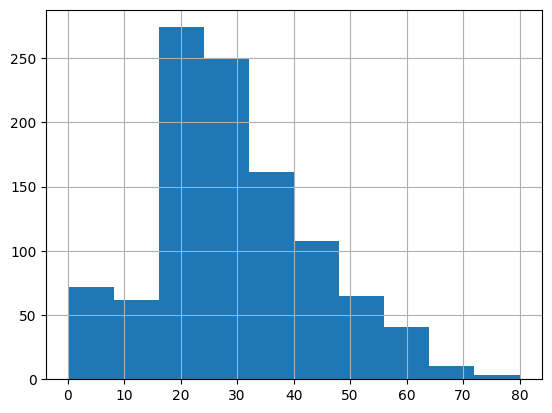

In [16]:
df['Idade'].hist()

In [17]:
#Neste campo estamos adicionando uma idade média para os valores nulos. Para isso utilizamos a condição de média de idade por classe
for i in df['Idade'].index:
  if pd.isnull(df['Idade'][i]):
    if df['Pclass'][i]==1:
      df['Idade'][i] = round(df[df['Pclass']==1]['Idade'].mean())
    elif df['Pclass'][i]==2:
      df['Idade'][i] = round(df[df['Pclass']==2]['Idade'].mean())
    elif df['Pclass'][i]==3:
      df['Idade'][i] = round(df[df['Pclass']==3]['Idade'].mean())
  else:
    continue

<ipython-input-17-903b93876383>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Idade'][i] = round(df[df['Pclass']==3]['Idade'].mean())
<ipython-input-17-903b93876383>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Idade'][i] = round(df[df['Pclass']==2]['Idade'].mean())
<ipython-input-17-903b93876383>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Idade'][i] = round(df[df['Pclass']==1]['Idade'].mean())


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    1309 non-null   int64  
 1   Sobrevivência  891 non-null    float64
 2   Pclass         1309 non-null   int64  
 3   Name           1309 non-null   object 
 4   Sex            1309 non-null   int64  
 5   Idade          1309 non-null   float64
 6   IrmConj        1309 non-null   int64  
 7   PaiFilho       1309 non-null   int64  
 8   Ticket         1309 non-null   object 
 9   Tarifa         1308 non-null   float64
 10  Cabin          295 non-null    object 
 11  Embarked       1307 non-null   object 
dtypes: float64(3), int64(5), object(4)
memory usage: 122.8+ KB


In [19]:
df.isnull().sum()

PassengerId         0
Sobrevivência     418
Pclass              0
Name                0
Sex                 0
Idade               0
IrmConj             0
PaiFilho            0
Ticket              0
Tarifa              1
Cabin            1014
Embarked            2
dtype: int64

## Tarifa

In [20]:
df[df['Tarifa'].isnull()]

,PassengerId,Sobrevivência,Pclass,Name,Sex,Idade,IrmConj,PaiFilho,Ticket,Tarifa,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",1,60.5,0,0,3701,NaN,NaN,S


A tarifa que está zerada é referente a galera de terceira classe. Como podemos observar a Tarifa tem uma alta correlação com a classe. Consequentemente podemos utiliza-la para fazer esse input
    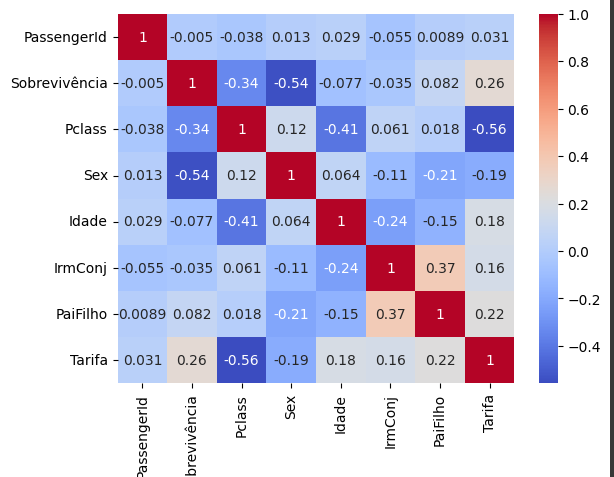

In [21]:
df[df['Pclass']==3]['Tarifa'].mean()

13.302888700564973

In [22]:
df['Tarifa'].fillna(df[df['Pclass']==3]['Tarifa'].mean(),inplace = True)

In [23]:
df[df['Tarifa'].isnull()] #Valor nulo substituido

,PassengerId,Sobrevivência,Pclass,Name,Sex,Idade,IrmConj,PaiFilho,Ticket,Tarifa,Cabin,Embarked


In [24]:
df.isnull().sum()

PassengerId         0
Sobrevivência     418
Pclass              0
Name                0
Sex                 0
Idade               0
IrmConj             0
PaiFilho            0
Ticket              0
Tarifa              0
Cabin            1014
Embarked            2
dtype: int64

# Variável Faixa Etaria

In [25]:
def cat_idade(idade):
  if idade<=12:
    return 'criança'
  elif 12 < idade <=17:
    return 'adolescente'
  elif 17 < idade <=30:
    return 'jovem'
  elif 30 < idade <=59:
    return 'adulto'
  else:
    return 'idoso'


In [26]:
df['etária'] = df['Idade'].apply(cat_idade)

In [27]:
df.head(10)

,PassengerId,Sobrevivência,Pclass,Name,Sex,Idade,IrmConj,PaiFilho,Ticket,Tarifa,Cabin,Embarked,etária
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,jovem
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,adulto
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,jovem
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,adulto
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,adulto
5,6,0.0,3,"Moran, Mr. James",1,25.0,0,0,330877,8.4583,NaN,Q,jovem
6,7,0.0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S,adulto
7,8,0.0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S,criança
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S,jovem
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C,adolescente


## Variável familiares

Se nós temos a quantidade de pais e quantidade de irmão em variáveis separadas, podemos fazer uma  nova variável informando a quantidade de parente total

In [28]:
df['Familia'] = df['PaiFilho']+df['IrmConj']

In [29]:
df.head()

,PassengerId,Sobrevivência,Pclass,Name,Sex,Idade,IrmConj,PaiFilho,Ticket,Tarifa,Cabin,Embarked,etária,Familia
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,jovem,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,adulto,1
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,jovem,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,adulto,1
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,adulto,0


## Tarifa

<Axes: >

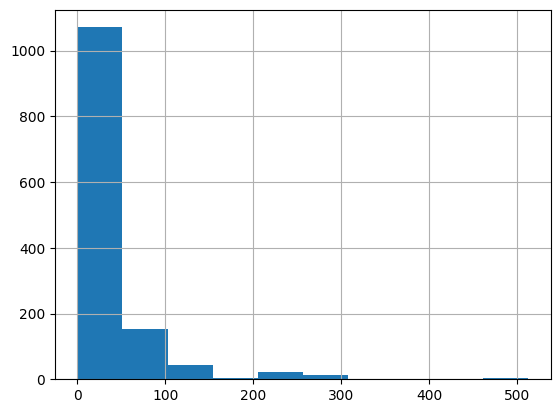

In [30]:
df['Tarifa'].hist()

In [31]:
df['Tarifa'].describe()

count    1309.000000
mean       33.280206
std        51.741830
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Tarifa, dtype: float64

In [32]:
df[df['Tarifa']==512.3292]

,PassengerId,Sobrevivência,Pclass,Name,Sex,Idade,IrmConj,PaiFilho,Ticket,Tarifa,Cabin,Embarked,etária,Familia
258,259,1.0,1,"Ward, Miss. Anna",0,35.0,0,0,PC 17755,512.3292,NaN,C,adulto,0
679,680,1.0,1,"Cardeza, Mr. Thomas Drake Martinez",1,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,adulto,1
737,738,1.0,1,"Lesurer, Mr. Gustave J",1,35.0,0,0,PC 17755,512.3292,B101,C,adulto,0
1234,1235,NaN,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",0,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,adulto,1


## Embarque

In [33]:
train['Embarked'].isnull().sum()

2

## **Cabine**

In [34]:
train['Cabin'].values

array([nan, 'C85', nan, 'C123', nan, nan, 'E46', nan, nan, nan, 'G6',
       'C103', nan, nan, nan, nan, nan, nan, nan, nan, nan, 'D56', nan,
       'A6', nan, nan, nan, 'C23 C25 C27', nan, nan, nan, 'B78', nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, 'D33', nan, 'B30', 'C52', nan, nan, nan,
       nan, nan, 'B28', 'C83', nan, nan, nan, 'F33', nan, nan, nan, nan,
       nan, nan, nan, nan, 'F G73', nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, 'C23 C25 C27', nan, nan, nan, 'E31', nan,
       nan, nan, 'A5', 'D10 D12', nan, nan, nan, nan, 'D26', nan, nan,
       nan, nan, nan, nan, nan, 'C110', nan, nan, nan, nan, nan, nan, nan,
       'B58 B60', nan, nan, nan, nan, 'E101', 'D26', nan, nan, nan,
       'F E69', nan, nan, nan, nan, nan, nan, nan, 'D47', 'C123', nan,
       'B86', nan, nan, nan, nan, nan, nan, nan, nan, 'F2', nan, nan,
       'C2', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

Variável com muitos valores nulos, então decidi nao usar na análise

In [35]:
df.isnull().sum()

PassengerId         0
Sobrevivência     418
Pclass              0
Name                0
Sex                 0
Idade               0
IrmConj             0
PaiFilho            0
Ticket              0
Tarifa              0
Cabin            1014
Embarked            2
etária              0
Familia             0
dtype: int64

In [36]:
df[df['Embarked'].isnull()]

,PassengerId,Sobrevivência,Pclass,Name,Sex,Idade,IrmConj,PaiFilho,Ticket,Tarifa,Cabin,Embarked,etária,Familia
61,62,1.0,1,"Icard, Miss. Amelie",0,38.0,0,0,113572,80.0,B28,NaN,adulto,0
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,62.0,0,0,113572,80.0,B28,NaN,idoso,0


Os dois valores nulos do Embarque, são passageiros que sobreviveram e estavam na primeira classe. Com isso podemos pegar qual o embarque que estavam na 1ª classe e teve maior % de sobrevivêntes.

In [37]:
df[(df['Pclass'] == 1) & (df['Embarked'] == 'S')]['Sobrevivência'].mean()

0.5826771653543307

In [38]:
df[(df['Pclass'] == 1) & (df['Embarked'] == 'C')]['Sobrevivência'].mean()

0.6941176470588235

In [39]:
df[(df['Pclass'] == 1) & (df['Embarked'] == 'Q')]['Sobrevivência'].mean()

0.5

Observamos que o embarque da primeira classe que teve maior frequência de sobrevivêntes, foi o Embarque C.

In [40]:
df['Embarked'].fillna('C', inplace = True)

In [41]:
df['Embarked'].isnull().sum()

0

In [42]:
df['Embarked'].value_counts()

S    914
C    272
Q    123
Name: Embarked, dtype: int64

In [43]:
df.isnull().sum()

PassengerId         0
Sobrevivência     418
Pclass              0
Name                0
Sex                 0
Idade               0
IrmConj             0
PaiFilho            0
Ticket              0
Tarifa              0
Cabin            1014
Embarked            0
etária              0
Familia             0
dtype: int64

In [44]:
df.head()

,PassengerId,Sobrevivência,Pclass,Name,Sex,Idade,IrmConj,PaiFilho,Ticket,Tarifa,Cabin,Embarked,etária,Familia
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,jovem,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,adulto,1
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,jovem,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,adulto,1
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,adulto,0


# Descritivo

## Classe

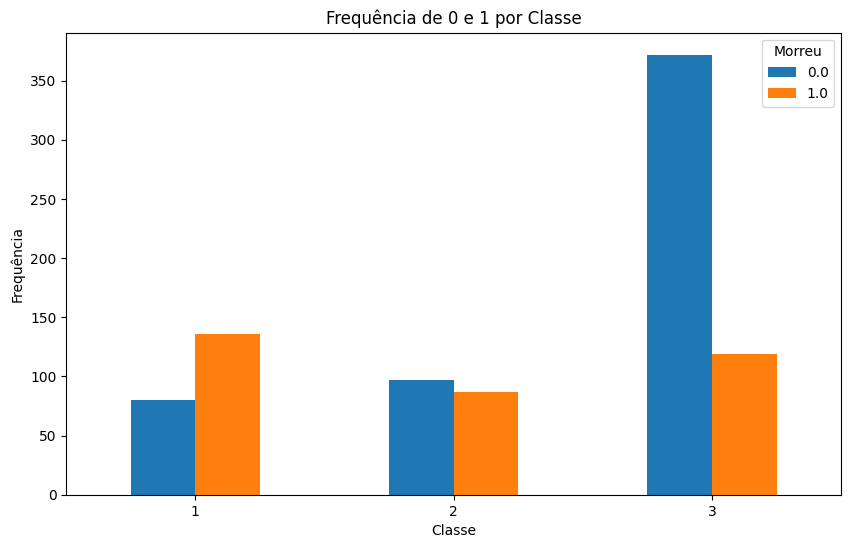

In [45]:
cross_tab = pd.crosstab(df['Pclass'], df['Sobrevivência'])

# Plot
ax = cross_tab.plot(kind='bar', figsize=(10, 6))
ax.set_title('Frequência de 0 e 1 por Classe')
ax.set_xlabel('Classe')
ax.set_ylabel('Frequência')
ax.legend(title='Morreu')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.show()

Cerca de 2/3 dos passageiros que estavam na terceira classe morreram

In [46]:
df[df['Pclass']==1]['Sobrevivência'].mean()

0.6296296296296297

Cerca de 63% dos passageiros que estavam na primeira classe, sobreviveram

In [47]:
df[df['Pclass']==2]['Sobrevivência'].mean()

0.47282608695652173

Cerca de 47% dos passageiros que estavam na segunda classe, sobreviveram





In [48]:
df[df['Pclass']==3]['Sobrevivência'].mean()

0.24236252545824846

Cerca de 24% dos passageiros que estavam na terceira classe, sobreviveram

## Sexo

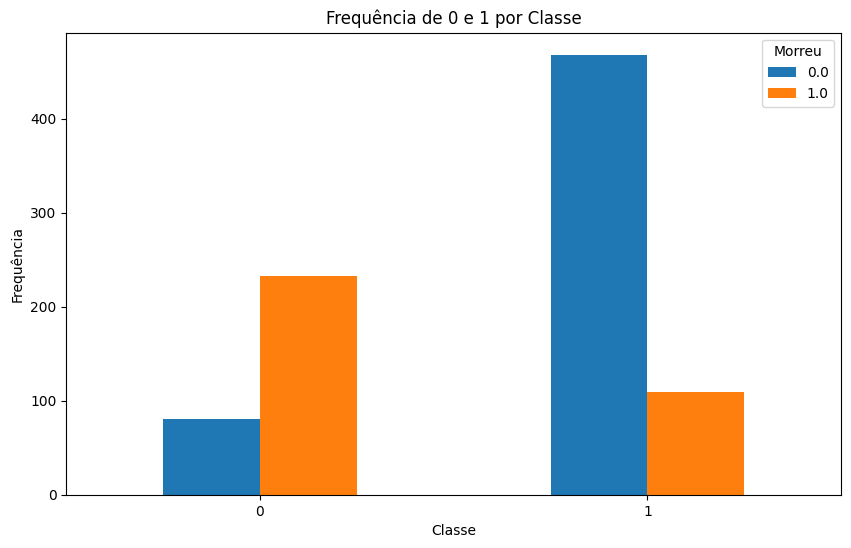

In [49]:
cross_tab = pd.crosstab(df['Sex'], df['Sobrevivência'])

# Plot
ax = cross_tab.plot(kind='bar', figsize=(10, 6))
ax.set_title('Frequência de 0 e 1 por Classe')
ax.set_xlabel('Classe')
ax.set_ylabel('Frequência')
ax.legend(title='Morreu')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.show()

In [50]:
df[df['Sex']==1]['Sobrevivência'].mean()

0.18890814558058924

74% das mulheres sobreviveram ao desastre do titanic

In [51]:
df[df['Sex']==1]['Sobrevivência'].mean()

0.18890814558058924

19% dos homens sobreviveram ao desastre do titanic

# Etária

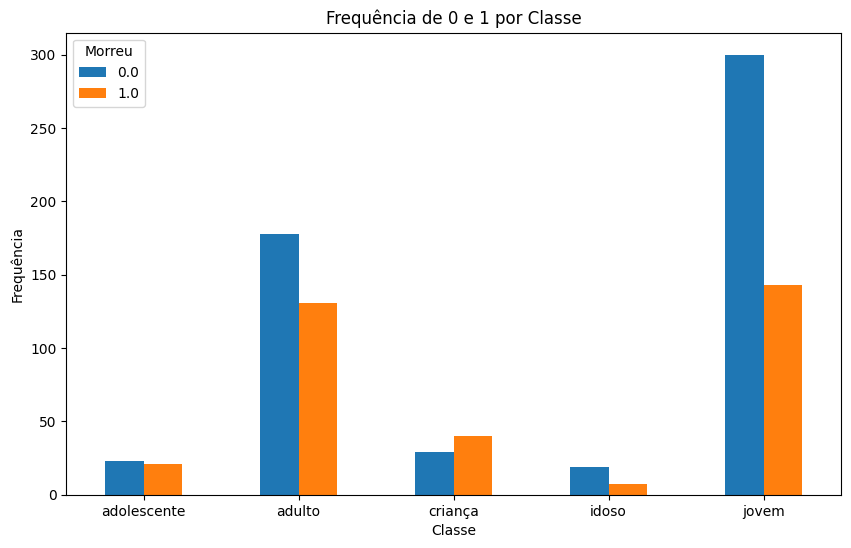

In [52]:
cross_tab = pd.crosstab(df['etária'], df['Sobrevivência'])

# Plot
ax = cross_tab.plot(kind='bar', figsize=(10, 6))
ax.set_title('Frequência de 0 e 1 por Classe')
ax.set_xlabel('Classe')
ax.set_ylabel('Frequência')
ax.legend(title='Morreu')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.show()

In [53]:
df[df['etária']=='adolescente']['Sobrevivência'].mean()

0.4772727272727273

In [54]:
df[df['etária']=='adulto']['Sobrevivência'].mean()

0.42394822006472493

In [55]:
df[df['etária']=='criança']['Sobrevivência'].mean()

0.5797101449275363

In [56]:
df[df['etária']=='idoso']['Sobrevivência'].mean()

0.2692307692307692

In [57]:
df[df['etária']=='jovem']['Sobrevivência'].mean()

0.3227990970654628

# Regressão

## Dummies

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    1309 non-null   int64  
 1   Sobrevivência  891 non-null    float64
 2   Pclass         1309 non-null   int64  
 3   Name           1309 non-null   object 
 4   Sex            1309 non-null   int64  
 5   Idade          1309 non-null   float64
 6   IrmConj        1309 non-null   int64  
 7   PaiFilho       1309 non-null   int64  
 8   Ticket         1309 non-null   object 
 9   Tarifa         1309 non-null   float64
 10  Cabin          295 non-null    object 
 11  Embarked       1309 non-null   object 
 12  etária         1309 non-null   object 
 13  Familia        1309 non-null   int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 143.3+ KB


In [60]:
df

,PassengerId,Sobrevivência,Pclass,Name,Sex,Idade,IrmConj,PaiFilho,Ticket,Tarifa,Cabin,Embarked,etária,Familia
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,jovem,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,adulto,1
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,jovem,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,adulto,1
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,adulto,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",1,25.0,0,0,A.5. 3236,8.0500,NaN,S,jovem,0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,C,adulto,0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,adulto,0
1307,1308,NaN,3,"Ware, Mr. Frederick",1,25.0,0,0,359309,8.0500,NaN,S,jovem,0


In [65]:
df_rl = df.drop(['Name','Ticket','Cabin'], axis = 1)

In [66]:
df_rl.head()

,PassengerId,Sobrevivência,Pclass,Sex,Idade,IrmConj,PaiFilho,Tarifa,Embarked,etária,Familia
0,1,0.0,3,1,22.0,1,0,7.2500,S,jovem,1
1,2,1.0,1,0,38.0,1,0,71.2833,C,adulto,1
2,3,1.0,3,0,26.0,0,0,7.9250,S,jovem,0
3,4,1.0,1,0,35.0,1,0,53.1000,S,adulto,1
4,5,0.0,3,1,35.0,0,0,8.0500,S,adulto,0


In [67]:
pclass = pd.get_dummies(df_rl['Pclass'], prefix = 'Pclass',drop_first=True)
embarque = pd.get_dummies(df_rl['Embarked'], prefix = 'Embarque',drop_first=True)
etaria = pd.get_dummies(df_rl['etária'], prefix = 'Etária',drop_first=True)

In [98]:
rl = pd.concat([df_rl,pclass,embarque,etaria],axis=1)

In [99]:
rl

,PassengerId,Sobrevivência,Pclass,Sex,Idade,IrmConj,PaiFilho,Tarifa,Embarked,etária,Familia,Pclass_2,Pclass_3,Embarque_Q,Embarque_S,Etária_adulto,Etária_criança,Etária_idoso,Etária_jovem
0,1,0.0,3,1,22.0,1,0,7.2500,S,jovem,1,0,1,0,1,0,0,0,1
1,2,1.0,1,0,38.0,1,0,71.2833,C,adulto,1,0,0,0,0,1,0,0,0
2,3,1.0,3,0,26.0,0,0,7.9250,S,jovem,0,0,1,0,1,0,0,0,1
3,4,1.0,1,0,35.0,1,0,53.1000,S,adulto,1,0,0,0,1,1,0,0,0
4,5,0.0,3,1,35.0,0,0,8.0500,S,adulto,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,1,25.0,0,0,8.0500,S,jovem,0,0,1,0,1,0,0,0,1
1305,1306,NaN,1,0,39.0,0,0,108.9000,C,adulto,0,0,0,0,0,1,0,0,0
1306,1307,NaN,3,1,38.5,0,0,7.2500,S,adulto,0,0,1,0,1,1,0,0,0
1307,1308,NaN,3,1,25.0,0,0,8.0500,S,jovem,0,0,1,0,1,0,0,0,1


In [100]:
rl.rename(columns={'Sobrevivência':'Survived','Idade':'Age','IrmConj':'SibSp','PaiFilho':'Parch','Tarifa':'Fare',}, inplace=True)

In [101]:
rl = rl.drop(['Pclass','Embarked','etária'],axis=1)

In [120]:
train = rl[:train_index].copy()
test = rl[891:1309].copy()

In [121]:
test

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Familia,Pclass_2,Pclass_3,Embarque_Q,Embarque_S,Etária_adulto,Etária_criança,Etária_idoso,Etária_jovem
891,892,NaN,1,34.5,0,0,7.8292,0,0,1,1,0,1,0,0,0
892,893,NaN,0,47.0,1,0,7.0000,1,0,1,0,1,1,0,0,0
893,894,NaN,1,62.0,0,0,9.6875,0,1,0,1,0,0,0,1,0
894,895,NaN,1,27.0,0,0,8.6625,0,0,1,0,1,0,0,0,1
895,896,NaN,0,22.0,1,1,12.2875,2,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,1,25.0,0,0,8.0500,0,0,1,0,1,0,0,0,1
1305,1306,NaN,0,39.0,0,0,108.9000,0,0,0,0,0,1,0,0,0
1306,1307,NaN,1,38.5,0,0,7.2500,0,0,1,0,1,1,0,0,0
1307,1308,NaN,1,25.0,0,0,8.0500,0,0,1,0,1,0,0,0,1


In [122]:
train['Survived'] = train['Survived'].astype(int)

In [123]:
x_train = train.drop('Survived',axis=1)
y_train = train['Survived']

In [124]:
x_test = test.drop('Survived',axis=1)

In [125]:
x_test

,PassengerId,Sex,Age,SibSp,Parch,Fare,Familia,Pclass_2,Pclass_3,Embarque_Q,Embarque_S,Etária_adulto,Etária_criança,Etária_idoso,Etária_jovem
891,892,1,34.5,0,0,7.8292,0,0,1,1,0,1,0,0,0
892,893,0,47.0,1,0,7.0000,1,0,1,0,1,1,0,0,0
893,894,1,62.0,0,0,9.6875,0,1,0,1,0,0,0,1,0
894,895,1,27.0,0,0,8.6625,0,0,1,0,1,0,0,0,1
895,896,0,22.0,1,1,12.2875,2,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,1,25.0,0,0,8.0500,0,0,1,0,1,0,0,0,1
1305,1306,0,39.0,0,0,108.9000,0,0,0,0,0,1,0,0,0
1306,1307,1,38.5,0,0,7.2500,0,0,1,0,1,1,0,0,0
1307,1308,1,25.0,0,0,8.0500,0,0,1,0,1,0,0,0,1


In [126]:
#Modelo
mod = LinearRegression()
mod.fit(x_train,y_train)

LinearRegression()

In [127]:
p =mod.predict(x_test)
p

array([ 0.1645257 ,  0.47747402,  0.20889515,  0.07367661,  0.52916986,
        0.16809693,  0.62643843,  0.18410779,  0.71020716,  0.01805083,
        0.08637179,  0.35706388,  0.91234611,  0.09500315,  0.82377115,
        0.81201198,  0.34584795,  0.18204106,  0.53167295,  0.61122433,
        0.33237281,  0.33880939,  0.91373604,  0.49160192,  0.86294777,
       -0.04738373,  0.99417642,  0.17239095,  0.39152935,  0.06117979,
        0.14006762,  0.18441267,  0.50091776,  0.47801539,  0.4178735 ,
        0.19839014,  0.59541568,  0.62162053,  0.08726769,  0.10727936,
        0.1074699 ,  0.40291519,  0.05885649,  0.74767354,  0.8332982 ,
        0.08665055,  0.43535427,  0.15044208,  0.90607858,  0.53018908,
        0.38789276,  0.32923689,  0.67899718,  0.78265086,  0.31003969,
        0.20514519,  0.09788731,  0.08662481,  0.03964492,  1.10163038,
        0.14849727,  0.30228147,  0.13209434,  0.67878599,  0.50137134,
        0.7512462 ,  0.70481098,  0.35798664,  0.52580469,  0.71

In [128]:
# como o resultado da variável p é um número entre 0 e 1, convertemos ele para 0 se for menor que 0.5 e para 1 se maior

Survived_Predict = [1 if  i > 0.7 else 0 for i in p]
df_pred1 = x_test.loc[:,['PassengerId']]
df_pred1['Survived'] = Survived_Predict


In [129]:
df_pred1

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,0
...,...,...
1304,1305,0
1305,1306,1
1306,1307,0
1307,1308,0


In [130]:
from google.colab import files
df_pred1.to_csv('predict.csv', index=False)
files.download('predict.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Modelo 2